In [1]:
#from pyEmceeFit import *
from logspace import *

In [2]:
#sampler,pos,prob,state,flat_samples = main(True,False)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [3]:
SummitResults = readPickle('pyEmceeLogVar.p')
flat_samples,pos,prob = SummitResults

In [4]:
 for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
        print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6]))

i = 64.17, rMin = 5849.02, MFac = 0.43, rFac = 10.19, f1 (sin^2) = 0.63, f2 (cos^2) = 0.34, f3 (sin*cos)= 0.46
i = 40.03, rMin = 2298.27, MFac = 0.88, rFac = 25.64, f1 (sin^2) = 0.70, f2 (cos^2) = 0.03, f3 (sin*cos)= 0.21
i = 58.70, rMin = 3429.58, MFac = 0.45, rFac = 22.93, f1 (sin^2) = 0.77, f2 (cos^2) = 0.71, f3 (sin*cos)= 0.73
i = 51.90, rMin = 1759.27, MFac = 0.85, rFac = 24.52, f1 (sin^2) = 0.47, f2 (cos^2) = 0.71, f3 (sin*cos)= 0.21
i = 49.29, rMin = 2204.76, MFac = 0.57, rFac = 37.63, f1 (sin^2) = 0.65, f2 (cos^2) = 0.72, f3 (sin*cos)= 0.59
i = 54.35, rMin = 4716.04, MFac = 0.48, rFac = 22.15, f1 (sin^2) = 0.54, f2 (cos^2) = 0.51, f3 (sin*cos)= 0.48
i = 46.83, rMin = 4594.18, MFac = 0.31, rFac = 22.07, f1 (sin^2) = 0.16, f2 (cos^2) = 0.09, f3 (sin*cos)= 0.12
i = 71.80, rMin = 3196.93, MFac = 0.47, rFac = 24.58, f1 (sin^2) = 0.34, f2 (cos^2) = 0.37, f3 (sin*cos)= 0.42
i = 59.60, rMin = 3372.50, MFac = 0.51, rFac = 34.10, f1 (sin^2) = 0.80, f2 (cos^2) = 0.60, f3 (sin*cos)= 0.85
i

In [13]:
def plotParams(data,θList,mα=0.1):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6))
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=4,label="3C 273",markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax2.errorbar(ν,np.mean(np.array(data[4])[indx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=4,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax3.errorbar(ν,np.mean(np.array(data[4])[oindx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=4,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,np.mean(np.array(data[4])[indx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,np.mean(np.array(data[4])[oindx],axis=0)-0.07,np.mean(np.array(data[4])[oindx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa,scale = θ
        line,phaseList = getProfiles(ν,θ,data)
        phase = np.mean(np.array(phaseList)[indx],axis=0); phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Disk wind model ({} samples)".format(N) if place == 1 else ""
        ax1.plot(ν,line,label=label,lw=2,c='crimson',alpha=mα)
        ax2.plot(ν,phase,label=label,lw=2,c='crimson',alpha=mα)
        ax3.plot(ν,phaseo,label=label,lw=2,c='crimson',alpha=mα)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    ax2.set_xlabel("Velocity [km/s]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

def plotPhases(data,θList,mα=0.1):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axs = plt.subplots(nrows=8,ncols=3,figsize=(12,40),sharex=True,sharey=True)
    place = 0; strLen = 0; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa,scale = θ
        line,phaseList = getProfiles(ν,θ,data)
        ind = 0
        for ax in axs.reshape(-1):
            onoff = "on" if ind in indx else "off"
            ax.errorbar(ν,data[4][ind],yerr=data[5][ind],marker="o",ms=3,markerfacecolor="dodgerblue",markeredgecolor="dodgerblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
            ax.fill_between(ν,data[4][ind]-data[5][ind],data[4][ind]+data[5][ind],color="dodgerblue",alpha=0.5)
            ax.plot(ν,phaseList[ind],lw=2,c="crimson",alpha=mα)
            ax.set_title("index = {0} ({1})".format(ind,onoff))
            ax.set_xlabel("velocity [km/s]"); ax.set_ylabel("phase [deg]")
            ind += 1
        strLen = trackPercent(place,N,strLen)
    return fig,axs
        

-648.6485250373036
100.00 % complete

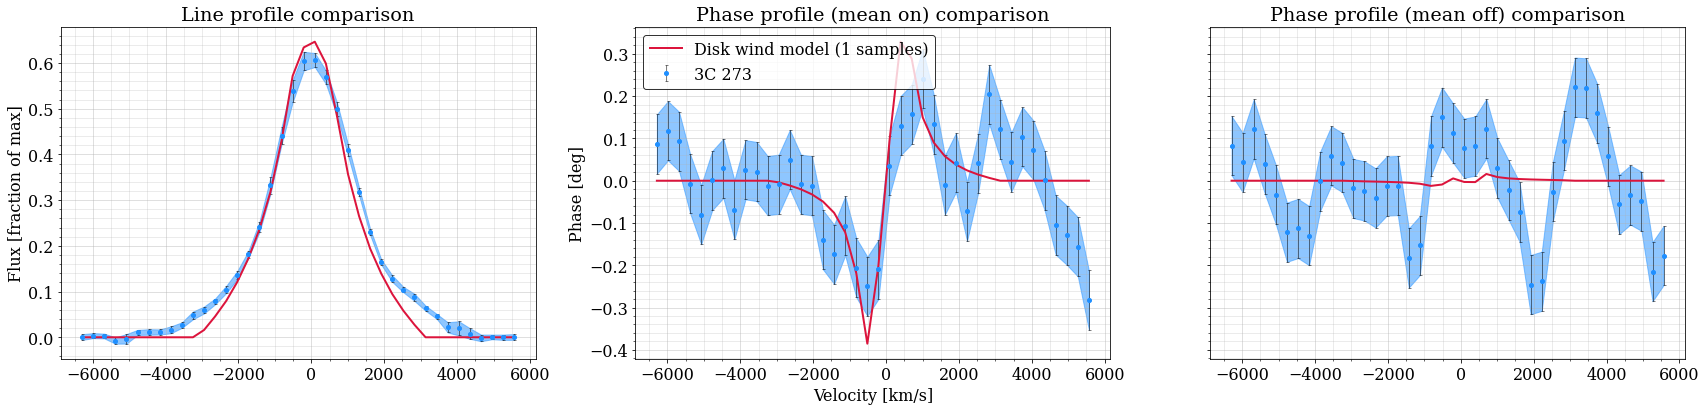

In [14]:
#making a guess at what it should be
θ = [30.,3e3,0.7,30.,0.6,0.6,0.4,340.,1.1] #i,rBar,Mfac,rFac,f1,f2,f3,pa,scale -- 30.,1e3,1.1,1.,0.57,0.6,0.46,342.,1.1 is a good guess
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
print(log_prob(θ,vel,data))
plotParams(data,[θ],1);

0.00 % complete

(<Figure size 864x2880 with 24 Axes>,
 array([[<AxesSubplot:title={'center':'index = 0 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 1 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 2 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
        [<AxesSubplot:title={'center':'index = 3 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 4 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 5 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
        [<AxesSubplot:title={'center':'index = 6 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 7 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 8 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
  

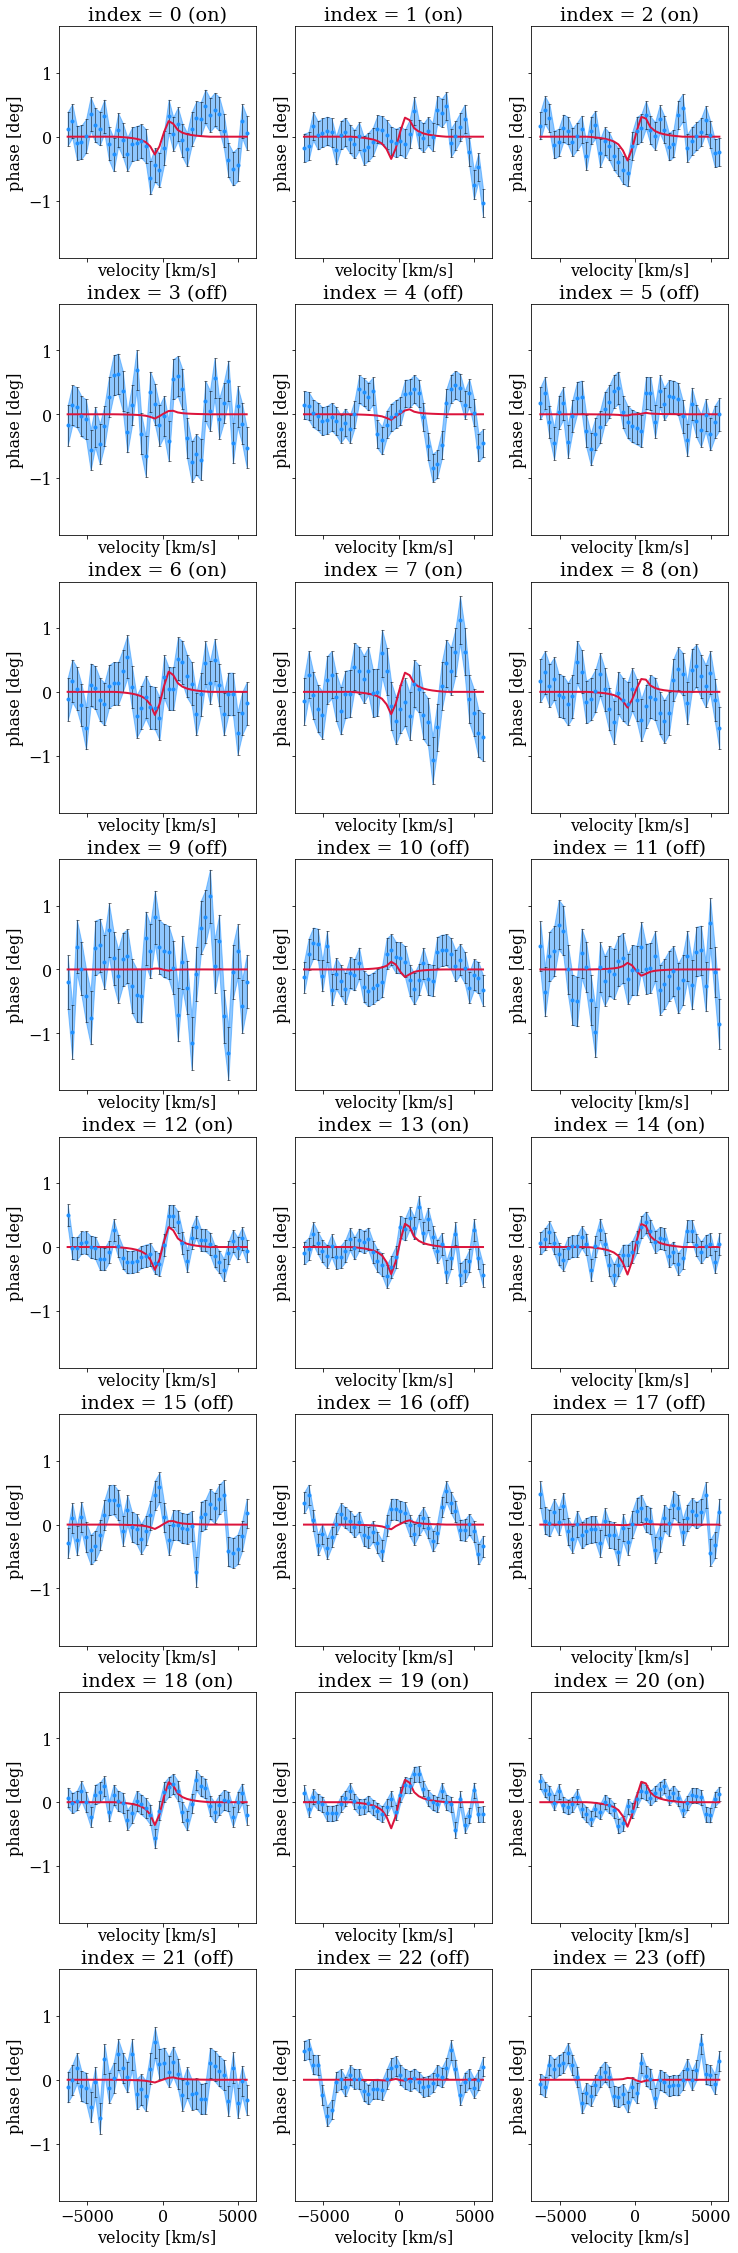

In [8]:
plotPhases(data,[θ],1)

100.00 % complete       

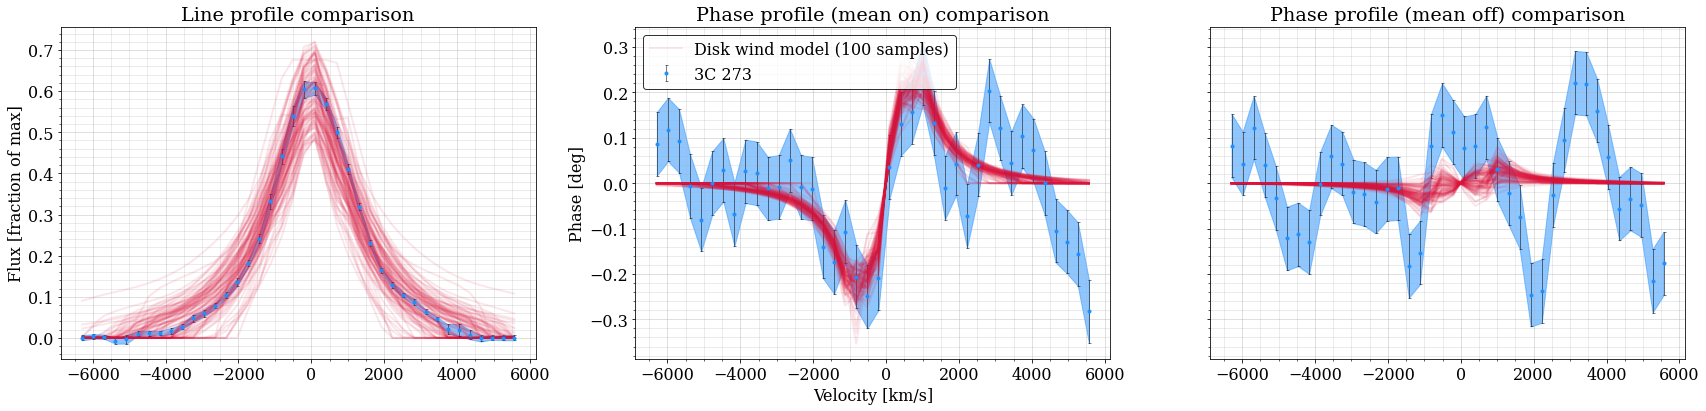

In [7]:
θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)

In [8]:
from IPython.display import display, Math
labels=["i","rBar","MFac","rFac","f1","f2","f3","PA","scale"]
for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

![cloud parameters](cloudParams.png)

-626.6478480823637
-626.6478480823637
100.00 % complete

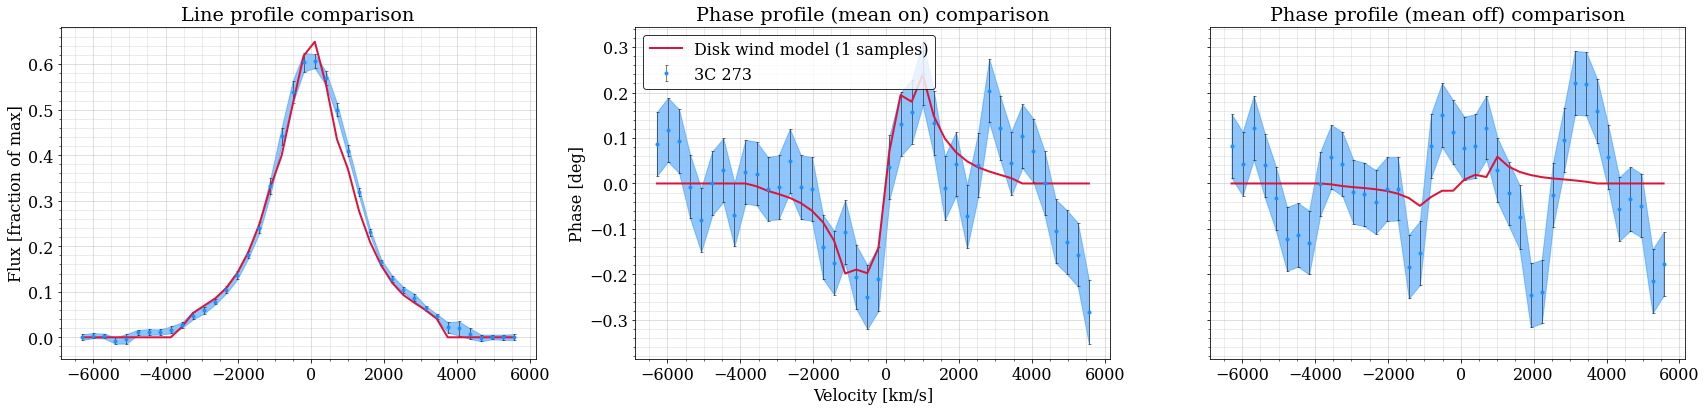

In [9]:
np.min(prob) #plot the best case
minInd = np.argmin(prob)
θBest = θList[minInd]
print(log_prob(θBest,vel,data))
#θBest[8]*=1/0.9
print(log_prob(θBest,vel,data))
fig,ax1,ax2,ax3=plotParams(data,[θBest],1)
fig.savefig('best_params.png')

In [10]:
print("i = {0:.2f}, rBar = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, PA = {7:.2f}, scale = {8:.2f}".format(θBest[0],θBest[1],θBest[2],θBest[3],θBest[4],θBest[5],θBest[6],θBest[7],θBest[8]))

i = 57.55, rBar = 5590.94, MFac = 0.36, rFac = 15.80, f1 (sin^2) = 0.80, f2 (cos^2) = 0.84, f3 (sin*cos)= 0.75, PA = 348.50, scale = 1.09


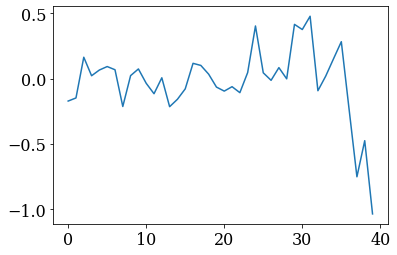

In [13]:
plt.plot(data[4][1])

In [14]:
def rBar(γ,rMin=710.14,rMax=3e4):
    num = (rMax**(γ-3/2)-rMin**(γ-3/2))*(1-1/(γ-3/2))
    den = rMax**(γ-5/2)-rMin**(γ-5/2) 
    return num/den
rBar(1,1e3,1.5e4)
def get_rMinMax(rBar,rFac,γ=1):
        rMin = rBar*(rFac**(γ-5/2)-1)/(rFac**(γ-3/2)-1)*(γ-3/2)/(γ-5/2)
        rMax = rMin*rFac
        return rMin,rMax
get_rMinMax(rBar(1,1e3,1.5e4),15)

(1000.0000000000001, 15000.000000000002)

In [15]:
blRange=θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24
print("rough size = {:.2f} μas".format(θBest[1]*blRange*2/4.85e-12))

rough size = 28.90 μas


In [16]:
def δrBar(rBar,γ,δrMin,rMin=710.14,rMax=3e4): #this is wrong
    pre = rBar*(1-1/(γ-3/2))
    t1 = (rMin**(γ-5/2))*(γ-3/2)*δrMin/(rMax**(γ-3/2)-rMin**(γ-3/2))
    t2 = (rMin**(γ-7/2))*(γ-5/2)*δrMin/(rMax**(γ-5/2)-rMin**(γ-5/2))
    return pre*np.sqrt(t1**2+t2**2)

In [17]:
mcmc = np.percentile(flat_samples[:,1], [16, 50, 84])
q = np.diff(mcmc) #get upper and lower bounds for rMin
lower = q[0]; upper = q[1]
δrBarU = δrBar(rBar(1),1,upper); δrBarL = δrBar(rBar(1),1,lower)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(rBar(1)*blRange/4.85e-12, δrBarL*blRange/4.85e-12, δrBarU*blRange/4.85e-12, "r bar")
display(Math(txt)) #super wrong

<IPython.core.display.Math object>